

# Ephaptic Coupling #

### Import stuff

In [1]:
%pylab inline

import numpy as np
import sys
if sys.version < '3':
    from urllib2 import urlopen
else:    
    from urllib.request import urlopen
import ssl
from warnings import warn
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.collections import PolyCollection
from os.path import join
import LFPy
import neuron
from neuron import h
from create_generator_grid_electrode import generator_grid

Populating the interactive namespace from numpy and matplotlib


### Define morphology and cell parameters

In [2]:
# define cell parameters used as input to cell-class
cellParameters = {
    'morphology' : 'morphology/mitral/mitral.hoc',     # mitral neuron (olfactory)
#     'morphology' : 'morphology/mitral.hoc',            # mitral neuron (olfactory)
#     'morphology' : 'morphology/purkinje.hoc',          # purkinje neuron (cerebellum)
#     'morphology' : 'morphology/pyramidal_layer2.hoc',  # pyramidal neuron (cortex)
#     'morphology' : 'morphology/pyramidal_layer5.hoc',  # pyramidal neuron (cortex)
#     'morphology' : 'morphology/aspiny_layer3.hoc',     # aspiny neuron (cortex)
#     'morphology' : 'morphology/stellate_layer4.hoc' ,   # stellate neuron (cortex)
    'cm' : 1.0,                 # membrane capacitance - Defaults to 1.0 uF/cm2 
    'Ra' : 150.,                # axial resistance - Defaults to 150 Ohm/cm 
    'passive' : True,           # turn on NEURONs passive mechanism for all sections
    'nsegs_method' : None,      # spatial discretization method
    'dt' : 2**-6,               # simulation time step size
    'tstart' : 0,               # start time of simulation
    'tstop' : 30,               # stop simulation
    'v_init' : -60,             # initial crossmembrane potential
    'celsius': 34,
    'pt3d' : True,
    'extracellular': True,
    'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65},
}

In [3]:
#Generating input from de cell1
spike_times1 = [24.9]
xs1 = -200
ys1 = 0
zs1 = 0
sigma = 0.3

grid_electrode1, synapse1, X, Y, Z = generator_grid(spike_times1,xs1,ys1,zs1,sigma)

	1 
-220.0647817210277
calculations finished, <LFPy.recextelectrode.RecExtElectrode object at 0x7f3098814910>, <LFPy.cell.Cell object at 0x7f309678d3d0>


In [4]:
#Generating input from de cell2
spike_times2 = [15]
xs2 = 200
ys2 = 0
zs2 = 0
sigma = 0.3

grid_electrode2, synapse2, X, Y, Z = generator_grid(spike_times2,xs2,ys2,zs2,sigma)


	1 
Overwriting custom temperature of 34.00. New temperature is 34.00
179.9352182789723
calculations finished, <LFPy.recextelectrode.RecExtElectrode object at 0x7f30c4a175d0>, <LFPy.cell.Cell object at 0x7f309678dd10>


### Create grid electrode (for contour plot) and point electrode (for simple plots)

In [5]:
# initialize cell instance, using the LFPy.Cell class
receptor_cell = LFPy.Cell(**cellParameters)
receptor_cell.set_rotation(x=4.729, y=-3.166)
receptor_cell.xmid += 0         # added distance of the electrodes to the receptor cell in x plane


	1 
Overwriting custom temperature of 34.00. New temperature is 34.00


In [6]:
grid_electrode = grid_electrode1 + grid_electrode2

/home/renata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/home/renata/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/renata/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/renata/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/renata/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/renata/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax

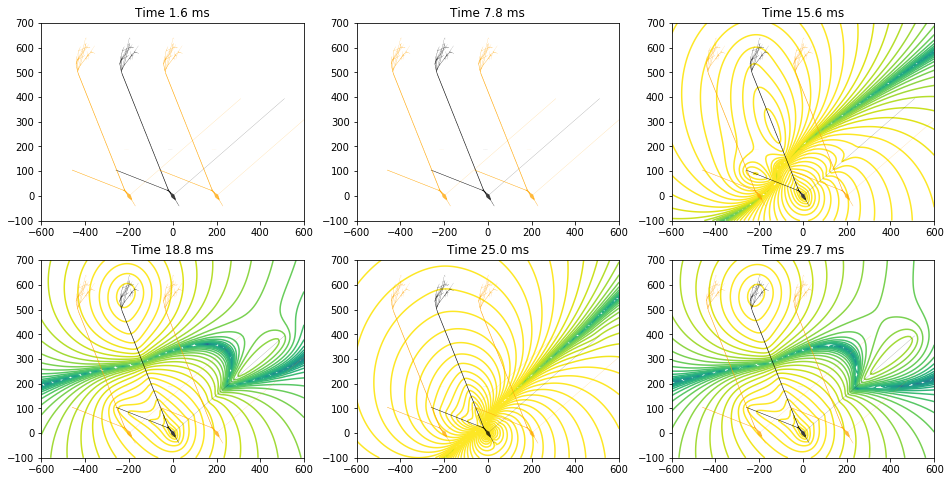

In [7]:
def ctime(t,ax=None,vmin=-10,vmax=-5):
    
    ax = plt.gca() if ax == None else ax

    #LFP = np.max(np.abs(grid_electrode.LFP),1).reshape(X.shape)  
    LFP = np.abs(grid_electrode[:,t]).reshape(X.shape)  

    im = ax.contour(X, Z, np.log10(LFP), 50,
               cmap='viridis', vmin=vmin, vmax=vmax,  #'viridis', 'plasma', 'inferno', 'magma', 'cividis' https://matplotlib.org/tutorials/colors/colormaps.html#mycarta-banding
               zorder=-2)
    #cbar = fig.colorbar(im, cax=cax)
    #cbar.set_label('$|\Phi(\mathbf{r}, t)|$ (nV)')
    #cbar.outline.set_visible(False)

    
    # plot morphology of receptor cell
    zips = []
    for x, z in receptor_cell.get_idx_polygons():
        zips.append(list(zip(x, z)))
    polycol = PolyCollection(zips,
                             edgecolors='none',
                             facecolors='k')
    ax.add_collection(polycol)

    # plot morphology of generator cell 1
    shift = 100          # shift of receptor_cell in x dimension
    zips = []
    for x, z in receptor_cell.get_idx_polygons():
        zips.append(list(zip(x+xs1, z)))
    polycol = PolyCollection(zips,
                             edgecolors='none',
                             facecolors= 'orange')
    ax.add_collection(polycol)
    
    
    # plot morphology of generator cell 2
    shift = 100          # shift of receptor_cell in x dimension
    zips = []
    for x, z in receptor_cell.get_idx_polygons():
        zips.append(list(zip(x+xs2, z)))
    polycol = PolyCollection(zips,
                             edgecolors='none',
                             facecolors= 'orange')
    ax.add_collection(polycol)

    ax.set_ylim(-100,700)
    ax.set_xlim(-600,600)
    ax.axis('on')
    
fig,axes = plt.subplots(2,3,figsize=(16,8))
times = [100,500,1000,1200,1600,1900]
for t,ax in zip(times,axes.ravel()):
    ctime(t,ax=ax)
    ax.set_title('Time %.1f ms'%(t*2**-6))

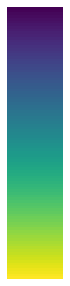

In [8]:
plt.figure(figsize=(1,5))
plt.imshow(np.linspace(-10,-5,100).reshape(-1,1),vmin=-10,vmax=-5,cmap='viridis', aspect='auto')
plt.gca().set_axis_off()

/home/renata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


ValueError: supplied range of [-inf, -1.4474833443859034] is not finite

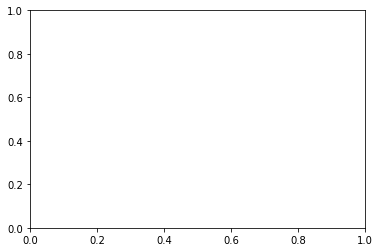

In [9]:
#Histograma para definir os limites vmin e vmax
plt.hist(np.log10(np.abs(grid_electrode.ravel())),20)